In [6]:
# !curl -O https://data.giss.nasa.gov/pub/gistemp/gistemp250.nc.gz
# !gunzip gistemp250.nc.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9170k  100 9170k    0     0  3419k      0  0:00:02  0:00:02 --:--:-- 3423k


In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pp
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from datetime import datetime
from netCDF4 import date2index

In [15]:
data = Dataset('gistemp250.nc')


In [16]:
data.variables

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  standard_name: latitude
                  long_name: Latitude
                  units: degrees_north
              unlimited dimensions: 
              current shape = (90,)
              filling off), ('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  standard_name: longitude
                  long_name: Longitude
                  units: degrees_east
              unlimited dimensions: 
              current shape = (180,)
              filling off), ('time', <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  long_name: time
                  units: days since 1800-01-01 00:00:00
                  bounds: time_bnds
              unlimited dimensions: 
              current shape = (1647,)
              filling off), ('time_bnds', <class 'netCDF4._netCDF4.Variable'>
              int32 time_bnds(time, nv)


In [21]:
timeindex = date2index(datetime(2014, 1, 15),
                                 data.variables['time'])
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

In [22]:
temp_anomaly

masked_array(data =
 [[0.6499999761581421 0.6499999761581421 0.6499999761581421 ...,
  0.6499999761581421 0.6499999761581421 0.6499999761581421]
 [0.6499999761581421 0.6499999761581421 0.6499999761581421 ...,
  0.6499999761581421 0.6499999761581421 0.6499999761581421]
 [0.6499999761581421 0.6499999761581421 0.6499999761581421 ...,
  0.6499999761581421 0.6499999761581421 0.6499999761581421]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = 32767)

/Users/jakerobertson/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/jakerobertson/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/jakerobertson/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/jakerobertson/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


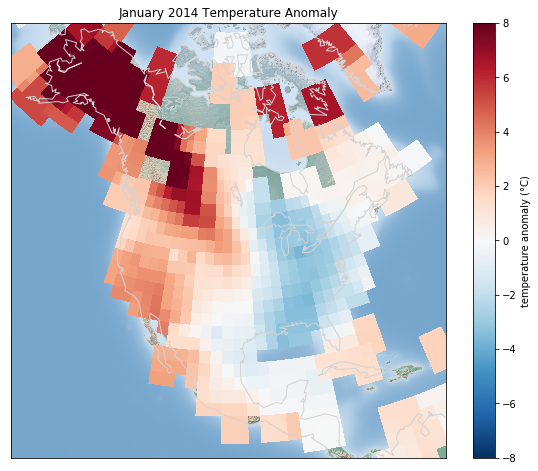

In [23]:
fig = pp.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
                      width=8E6, height=8E6,
                      lat_0=45, lon_0=-100,)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly,
                       latlon=True, cmap='RdBu_r')
pp.clim(-8, 8)
m.drawcoastlines(color='lightgray')
pp.title('January 2014 Temperature Anomaly')
pp.colorbar(label='temperature anomaly (°C)');